In [27]:
# Elle Nguyen - Section 02
# Lab 7 - Dimensionality Reduction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

df = pd.read_csv('heart.csv')

In [28]:
# Task 1.1 - Preprocess the raw data

# Check whether there are missing values
print(df.isnull().sum())
print("\nThere are no missing values in this dataset.\n")

# Check whether there are categorical features
print(df.info())
print("\nThere are no categorical features in this dataset.\n")

# Normalize the feature
X,y = df.drop(columns=['target']).to_numpy(),df.target.to_numpy()

normalizer = StandardScaler()
X = normalizer.fit_transform(X)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64

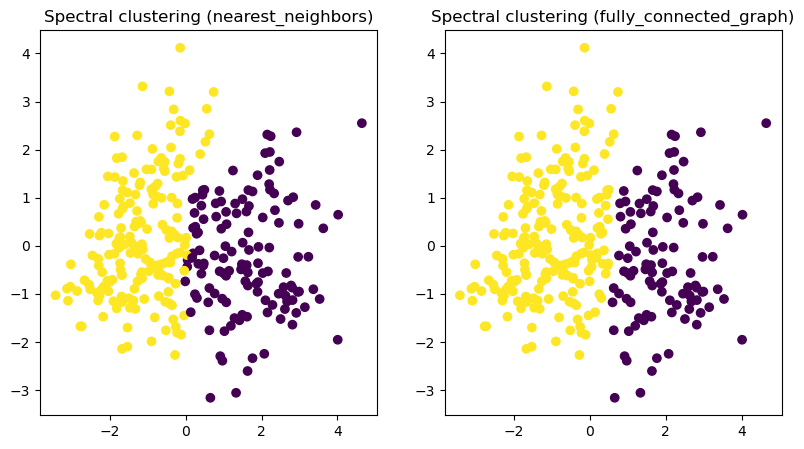

In [29]:
# Task 1.2 - Partition the dataset with Spectral Clustering and compute its NMI

# Reduce into 2 features
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Partition the dataset with KNN
cluster_sp_nn = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X_r)

# Partition the dataset with fully connected graph
cluster_sp_rbf = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='rbf', random_state=0).fit(X_r)

# Visualize spectral clustering
plt.figure(figsize=(20,5))

plt.subplot(1,4,3)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_sp_nn.labels_)
plt.title('Spectral clustering (nearest_neighbors)')

plt.subplot(1,4,4)
plt.scatter(X_r[:, 0], X_r[:, 1], c=cluster_sp_rbf.labels_)
plt.title('Spectral clustering (fully_connected_graph)')

plt.show()

In [30]:
# Compare their clustering performance by visualization and computing NMI.
nmi_sp_nn = normalized_mutual_info_score(cluster_sp_nn.labels_, y, average_method='arithmetic')
nmi_sp_rbf = normalized_mutual_info_score(cluster_sp_rbf.labels_, y, average_method='arithmetic')

print('The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is {:.4f}'.format(nmi_sp_nn))
print('The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is {:.4f}'.format(nmi_sp_rbf))

The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is 0.2796
The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is 0.3274


In [31]:
# Task 2.1 - Preprocess the raw data

df = pd.read_csv('heart.csv')

# Check whether there are missing values
print(df.isnull().sum())
print("\nThere are no missing values in this dataset.\n")

# Check whether there are categorical features
print(df.info())
print("\nThere are no categorical features in this dataset.\n")

# Normalize the feature
X,y = df.drop(columns=['target']).to_numpy(),df.target.to_numpy()

normalizer = StandardScaler()
X = normalizer.fit_transform(X)

# Centering the data
X -= np.mean(X, axis = 0)  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64

number of original features: 13
number of new features: 2


Text(0.5, 1.0, 'PCA of heart disease dataset')

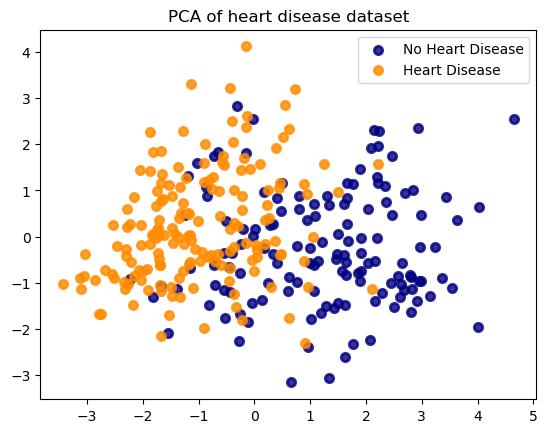

In [32]:
# Task 2.2 - Use PCA to do dimensionality reduction for visualization

print('number of original features: {}'.format(X.shape[1]))

# Reduce into 2 features
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('number of new features: {}'.format(X_r.shape[1]))

# Visualization
plt.figure()
colors = ['navy', 'darkorange']
target_names = ['No Heart Disease', 'Heart Disease']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of heart disease dataset')

In [39]:
# Task 2.3 - Use PCA to do dimensionality reduction and then conduct classification

# Reduce the number of features to different values
n = [2, 5, 7, 10, 12]

# Run logistic regression model with the dimensionality-reduced data
for val in n:
    # Reduce dimensionality
    pca = PCA(n_components=val)
    X_r = pca.fit(X).transform(X)
    
    # Split data into 2 subsets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X_r, y, 
                                                                test_size=0.15, 
                                                                random_state=0)
    
    # Normalize the feature
    normalizer = StandardScaler()
    X_train_val = normalizer.fit_transform(X_train_val)
    X_test = normalizer.transform(X_test)
    
    # Retrain the model
    clf = LogisticRegression(penalty='l2', solver='lbfgs')
    clf.fit(X_train_val, y_train_val)
    y_test_pred = clf.predict(X_test)
    
    # Compare the classification performance
    acc = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    print(f"PCA n = {val}: accuracy: {acc:.3f}, recall: {recall:.3f}, precision: {precision:.3f}, f1: {f1:.3f}")

PCA n = 2: accuracy: 0.826, recall: 0.826, precision: 0.826, f1: 0.826
PCA n = 5: accuracy: 0.848, recall: 0.870, precision: 0.833, f1: 0.851
PCA n = 7: accuracy: 0.848, recall: 0.826, precision: 0.864, f1: 0.844
PCA n = 10: accuracy: 0.826, recall: 0.826, precision: 0.826, f1: 0.826
PCA n = 12: accuracy: 0.848, recall: 0.870, precision: 0.833, f1: 0.851
